In [1]:
import glob

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
% cd '/content/drive/Shareddrives/Manthan/Geeks/report/'
% ls

/content/drive/Shareddrives/Manthan/Geeks/report
00000001.jpg  00000054.jpg  conv1_filtered/  resize/


In [5]:
classes = ['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [ ]:
total = 0
t1 = 0
t2 = 0
t3 = 0
for i in classes:
    iii = glob.glob('{}/*.jpg'.format(i))
    t1 += len(iii)

    iii1 = glob.glob('{}/*.png'.format(i))
    t2 += len(iii1)

    iii2 = glob.glob('{}/*.jpeg'.format(i))
    t3 += len(iii2)

print("JPG", t1)
print("PNG", t2)
print("JPEG", t3)
print(t1+t2+t3)

JPG 1086
PNG 0
JPEG 0
1086


In [43]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2126 * r + 0.7152  * g + 0.0722 * b
    return gray

In [ ]:
import cv2 as cv2
for j in classes:
    p = glob.glob('{}/*'.format(j))

    print(j)
    for i in p:
        if i[-3:]=='png':
            img = cv2.imread(i)
            img = rgb2gray(img)
            path = '../converted_data/{}.jpg'.format(i[:-4])
            plt.imsave(path, img)

        elif i[-3:] == 'jpg':
            img = cv2.imread(i)
            img = rgb2gray(img)
            path = '../converted_data/{}.jpg'.format(i[:-4])
            plt.imsave(path, img)

        elif i[-3:] == 'peg':
            img = cv2.imread(i)
            img = rgb2gray(img)
            path = '../converted_data/{}.jpg'.format(i[:-5])
            plt.imsave(path, img)

Bishop
King
Knight
Pawn
Queen
Rook


In [ ]:
images = glob.glob('../converted_data/*/*')
print(len(images))

1086


In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
import cv2
from tensorflow.keras.layers import *
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomTranslation
from tensorflow.keras.models import Sequential, load_model

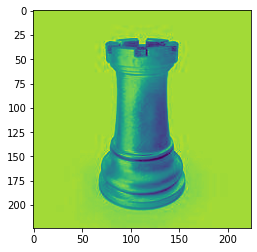

In [ ]:
plt.imshow(img)

In [ ]:
img.size

50176

In [ ]:
image_size=(256, 256)

dataset = image_dataset_from_directory(
    '/content/drive/Shareddrives/Manthan/Geeks/converted_data',
    image_size=image_size,
)

Found 1086 files belonging to 6 classes.


In [ ]:
dataset.class_names

['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [ ]:
gray_images = []
gray_labels = []

for images, labels in dataset:
    
    for i in range(len(images)):
        print(images[i])
        gray = rgb2gray(images[i])
        gray_images.append(gray)
        gray_labels.append(labels[i])
        break
    break

tf.Tensor(
[[[159.       217.        55.      ]
  [159.       217.        55.      ]
  [159.       217.        55.      ]
  ...
  [159.       217.        55.      ]
  [159.       217.        55.      ]
  [159.       217.        55.      ]]

 [[159.       217.        55.      ]
  [159.       217.        55.      ]
  [159.       217.        55.      ]
  ...
  [159.       217.        55.      ]
  [159.       217.        55.      ]
  [159.       217.        55.      ]]

 [[159.       217.        55.      ]
  [159.       217.        55.      ]
  [159.       217.        55.      ]
  ...
  [159.       217.        55.      ]
  [159.       217.        55.      ]
  [159.       217.        55.      ]]

 ...

 [[159.625    219.25      61.8125  ]
  [158.5586   218.74219   59.578125]
  [156.9375   217.50781   55.28125 ]
  ...
  [159.       217.        55.      ]
  [159.       217.        55.      ]
  [159.       217.        55.      ]]

 [[161.       222.1875    56.4375  ]
  [159.52734  220.5625    

In [ ]:
print(np.shape(gray_labels))

(1,)


(256, 256)


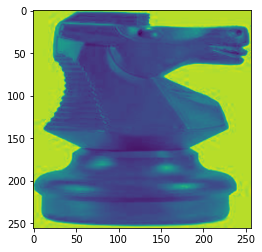

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(gray_images[0])
print(np.shape(gray_images[0]))

Gray Scaled Images


IndexError: ignored

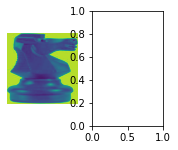

In [ ]:
print("Gray Scaled Images")
plt.figure(figsize=(15, 25))
for i in range(0, 50):
    plt.subplot(10, 10, i + 1)
    plt.imshow(np.array(gray_images[i]).astype("uint8"))
    plt.axis("off")

In [ ]:
def filter_generalized(img, filter):
#   filter=[[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]]
  # img = [

  #     [1, 2, 3, 4, 5, 6],
  #     [7, 8, 9, 10, 11, 12],
  #     [13, 14, 15, 16, 17, 18],
  #     [19, 20, 21, 22, 23, 24],
  #     [25, 26, 27, 28, 29, 30]
  # ]

  # img=[[96.0981, 96.0982, 96.0983, 96.0984, 96.0985, 96.0986],
  #  [96.0981, 96.0981, 96.0981,  96.0981, 96.0981, 96.0981],
  #  [96.0981, 96.0981, 96.0981,  96.0981, 96.0981, 96.0981],
  #  [96.0981, 96.0981, 96.0981,  96.0981, 96.0981, 96.0981],
  #  [96.0981, 96.0981, 96.0981,  96.0981, 96.0981, 96.0981],
  #  [96.0981, 96.0981, 96.0981,  96.0981, 96.0981, 96.0981]]
  # print(img)

  row=len(img)
  col=len(img[0])
  # print(row,col)


  start_row,start_col=0,0
  end_row,end_col=len(filter),len(filter[0])

  main_ans=[]
  update=[]
  while start_row+end_row<=row:
      check=img[start_row:start_row+end_row]
      # print(check,'dd')
      ans=[]
      while start_col+end_col<=col:
          lol=[]
          for k in range(len(check)):
              temp=check[k][start_col:start_col+end_col]
              lol.append(temp)
          start_col+=1
          summ=0
          for i in range(len(lol)):
              for j in range(len(lol[0])):
                  summ+=lol[i][j]*filter[i][j]
          update.append(summ/(end_row*end_col))

          ans.append(lol)
      start_col=0
      start_row+=1
      main_ans.append(ans)

  # print(update)
  count=0
  for i in range(len(img)-len(filter)+1):
      for j in range(len(img)-len(filter)+1):
          img[i][j]=update[count]
          count+=1

#   print(img)
  return img

NameError: ignored

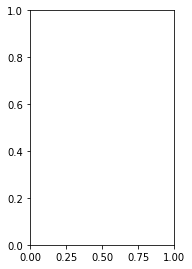

In [ ]:
plt.figure(figsize=(15, 25))
for i in range(0, 10):
    plt.subplot(5, 5, i + 1)
    final = np.array(gray_images[i])
    final = filter_generalized(final.copy(), filter_all_edges)
    plt.imshow(np.array(final).astype("uint8"))
    output_all_edges.append(final)
    plt.axis("off")

In [ ]:
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(1/16),
    RandomZoom((-0.1,0.1)),
    RandomContrast(0.2),  
    RandomTranslation(0.1,0.1)
])

In [ ]:
batch=32

train = keras.preprocessing.image_dataset_from_directory(
    '/content/drive/Shareddrives/Manthan/Geeks/Data',
    validation_split=.2,
    subset='training',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 1040 files belonging to 6 classes.
Using 832 files for training.


In [ ]:

validation = keras.preprocessing.image_dataset_from_directory(
     '/content/drive/Shareddrives/Manthan/Geeks/Data',
    validation_split=.2,
    subset='validation',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 1040 files belonging to 6 classes.
Using 208 files for validation.


# Model1


In [ ]:
input_shape = (image_size[0], image_size[1], 3)
reg = keras.regularizers.l2(0.0005)

model = keras.Sequential()
model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=image_size + (3,), kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization(axis=3))
# model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization(axis=3))
# model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu", kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization(axis=3))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(train.class_names), activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)     

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)     

In [ ]:
# # model.compile(
# #     loss="categorical_crossentropy",
# #     optimizer="adam",
# #     metrics=["accuracy"]
# # )

# # xr = X_train.reshape((-1,1))

# model.compile(
#     loss="categorical_crossentropy",
#     optimizer="adam",
#     metrics=["accuracy"]
# )

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy']
            )

epochs = 5
model.fit(
    train,
    epochs=epochs,
)

Epoch 1/5


InvalidArgumentError: ignored

In [ ]:
epochs_range = [i+1 for i in range(epochs)]
plt.plot(epochs_range, model.history.history['accuracy'], '-o', label='Train')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend()

# Model2

In [ ]:
input_shape = (image_size[0], image_size[1], 3)
reg = keras.regularizers.l2(0.0005)

model2 = keras.Sequential()
model2.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=image_size + (3,), kernel_regularizer=reg))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))

model2.add(Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=reg))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.15))

model2.add(Conv2D(128, (3, 3), padding="same", activation="relu", kernel_regularizer=reg))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(256, (3, 3), padding="same", activation="relu", kernel_regularizer=reg))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.15))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))

model2.add(Dense(len(train.class_names), activation='softmax'))


model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 64)       

In [ ]:
# model.compile(
#     loss="categorical_crossentropy",
#     optimizer="adam",
#     metrics=["accuracy"]
# )

# xr = X_train.reshape((-1,1))

model2.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# model.compile(optimizer='adam',
#               loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
#               metrics=['accuracy']
#             )

epochs = 7
model2.fit(
    train,
    epochs=epochs,
)

Epoch 1/7
26/26 [==============================] - 147s 6s/step - loss: 0.3763 - accuracy: 0.8966
Epoch 2/7
26/26 [==============================] - 143s 5s/step - loss: 0.3023 - accuracy: 0.9087
Epoch 3/7
26/26 [==============================] - 142s 5s/step - loss: 0.3469 - accuracy: 0.9014
Epoch 4/7
26/26 [==============================] - 141s 5s/step - loss: 0.3225 - accuracy: 0.9351
Epoch 5/7
26/26 [==============================] - 140s 5s/step - loss: 0.2780 - accuracy: 0.9255
Epoch 6/7
26/26 [==============================] - 141s 5s/step - loss: 0.2380 - accuracy: 0.9423
Epoch 7/7
26/26 [==============================] - 140s 5s/step - loss: 0.2242 - accuracy: 0.9471


In [ ]:
!pip install h5py

In [ ]:
from keras.models import load_model

model2.save("network.h5")

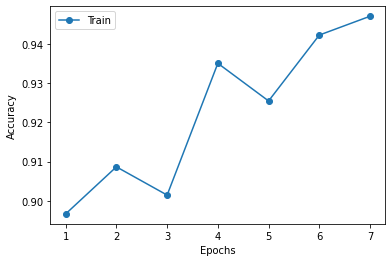

In [ ]:
epochs_range = [i+1 for i in range(epochs)]
plt.plot(epochs_range, model2.history.history['accuracy'], '-o', label='Train')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend()
plt.savefig('img.jpg')

In [ ]:
% ls

Bishop/  img.jpg  King/  Knight/  network.h5  Pawn/  Queen/  Rook/


# Activation functions

In [8]:
def Relu(x):
	return max(0.0, x)

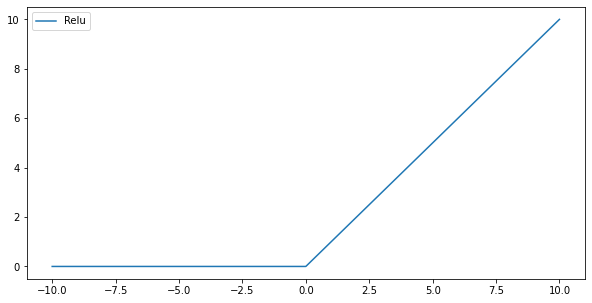

In [9]:
x = np.linspace(-10, 10, 1000)
y = np.maximum(0, x)

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.legend(['Relu'])
plt.show()

In [10]:
def Softmax(scores):
  return np.exp(scores)/sum(np.exp(scores))

In [11]:
import matplotlib.pyplot as plt

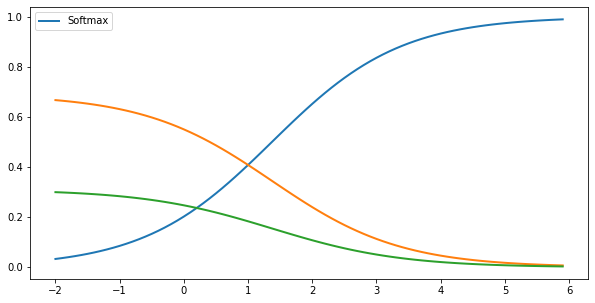

In [12]:
x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])

plt.figure(figsize=(10, 5))
plt.plot(x, Softmax(scores).T, linewidth=2)
plt.legend(['Softmax'])
plt.show()

#convolutional

In [13]:
def convolutional(img, filter):

    row=len(img)
    col=len(img[0])

    start_row,start_col=0,0
    end_row,end_col=len(filter),len(filter[0])

    main_ans=[]
    update=[]
    while start_row+end_row<=row:
        check=img[start_row:start_row+end_row]
        ans=[]
        while start_col+end_col<=col:
            lol=[]
            for k in range(len(check)):
                temp=check[k][start_col:start_col+end_col]
                lol.append(temp)
            start_col+=1
            summ=0
            for i in range(len(lol)):
                for j in range(len(lol[0])):
                    summ+=lol[i][j]*filter[i][j]
            update.append(summ)

            ans.append(lol)
        start_col=0
        start_row+=1
        main_ans.append(ans)

    # print(main_ans)
    count=0
    ans=[]
    for i in range(len(img)-len(filter)+1):
        temp=[]
        for j in range(len(img)-len(filter)+1):
            temp.append(update[count])
            count+=1
        ans.append(temp)
    return ans

# Filters

In [14]:
filters = {
           'Smoothing':[[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]],
           'Top-Edge':[[-1,-1,-1],[1,1,1],[0,0,0]],
           'Bottom-Edge':[[0,0,0],[1,1,1],[-1,-1,-1]],
           'Left-Edge':[[-1,1,0],[-1,1,0],[-1,1,0]],
           'Right-Edge':[[0,1,-1],[0,1,-1],[0,1,-1]],
           'Sobel-Bottom':[[-1,-2,-1],[0,0,0],[1,2,1]],
           'Sobel-Right':[[-1,0,1],[-2,0,2],[-1,0,1]],
           'Sobel-Top':[[1,2,1],[0,0,0],[-1,-2,-1]],
           'Sobel-Left':[[1,0,-1],[2,0,-2],[1,0,-1]],
           'Outline':[[-1,-1,-1],[-1,8,-1],[-1,-1,-1]],
           'Shaprens': [[0,-1,0], [-1,5,-1], [0,-1,0]],
           'Blur':[[0.06, 0.13, 0.6],[0.13, 0.25, 0.13],[0.06, 0.13, 0.6]],
           'slant1':[[1,-1,-1],[0,1,-1],[0,0,1]],
           'slant2':[[0,0,1],[0,1,-1],[1,-1,-1]],
           'slant3':[[1,0,0],[-1,1,0],[-1,-1,1]],
           'slant4':[[-1,-1,1],[-1,1,0],[1,0,0]],
           'kajukatli1':[[0,1,0],[1,0,1],[0,1,0]],
           'kajukatli0':[[1,0,1],[0,1,0],[1,0,1]],
           'prewitt-top':[[-1,-1,-1],[0,0,0],[1,1,1]],
           'prewitt-bottom':[[1,1,1],[0,0,0],[-1,-1,-1]],
           'prewitt-left':[[-1,0,1],[-1,0,1],[-1,0,1]],
           'prewitt-right':[[1,0,-1],[1,0,-1],[1,0,-1]],
           'Emboss':[[-2,-1,0],[-1,1,1],[0,1,2]],
           'Identity':[[0,0,0],[0,1,0],[0,0,0]],
           }

print(filters)

{'Smoothing': [[0.1111111111111111, 0.1111111111111111, 0.1111111111111111], [0.1111111111111111, 0.1111111111111111, 0.1111111111111111], [0.1111111111111111, 0.1111111111111111, 0.1111111111111111]], 'Top-Edge': [[-1, -1, -1], [1, 1, 1], [0, 0, 0]], 'Bottom-Edge': [[0, 0, 0], [1, 1, 1], [-1, -1, -1]], 'Left-Edge': [[-1, 1, 0], [-1, 1, 0], [-1, 1, 0]], 'Right-Edge': [[0, 1, -1], [0, 1, -1], [0, 1, -1]], 'Sobel-Bottom': [[-1, -2, -1], [0, 0, 0], [1, 2, 1]], 'Sobel-Right': [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], 'Sobel-Top': [[1, 2, 1], [0, 0, 0], [-1, -2, -1]], 'Sobel-Left': [[1, 0, -1], [2, 0, -2], [1, 0, -1]], 'Outline': [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], 'Shaprens': [[0, -1, 0], [-1, 5, -1], [0, -1, 0]], 'Blur': [[0.06, 0.13, 0.6], [0.13, 0.25, 0.13], [0.06, 0.13, 0.6]], 'slant1': [[1, -1, -1], [0, 1, -1], [0, 0, 1]], 'slant2': [[0, 0, 1], [0, 1, -1], [1, -1, -1]], 'slant3': [[1, 0, 0], [-1, 1, 0], [-1, -1, 1]], 'slant4': [[-1, -1, 1], [-1, 1, 0], [1, 0, 0]], 'kajukatli1': [[0

In [15]:
ans = []
temp = []
print(type(gray_images[0]))



NameError: ignored

In [ ]:
conv = convolutional(np.array(gray_images[0]), [[-1,-1,-1],[1,1,1],[0,0,0]])
plt.imsave('converted/converted.jpg', conv)

In [ ]:
for i in gray_images:
    for j, k in filters.items():
        print(j, k)
    # ans.append(temp)
    break


Top-Edge [[-1, -1, -1], [1, 1, 1], [0, 0, 0]]


# Conversion Started

In [ ]:
ans=[]
count=0
for i in gray_images:
    temp = []
    temp.append(i)
    count+=1
    for j, k in filters.items():
        conv = convolutional(np.array(i), k)
        # plt.imshow(conv)
        
        temp.append([j,gray_labels[count],conv])
        # print(temp)
        # print(temp)
        # print(j)
    ans.append(temp)
    print(count)
    if count==4:
        break

1
2
3
4


In [ ]:
print(ans[0])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print("Gray Scaled Images")
plt.figure(figsize=(20, 30))
for i in range(0, 50):
    plt.subplot(8, 8, i + 1)
    plt.imshow(np.array(gray_images[i]).astype("uint8"))
    plt.axis("off")

In [ ]:
print(gray_labels)

[<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=5>, <tf.Tensor: shape=(), dtype=int32, numpy=5>, <tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=5>, <tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=5>, <tf.Tensor: shape=(), dtype=int32, numpy=5>, <tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=5>, <tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tenso

['Top-Edge', <tf.Tensor: shape=(), dtype=int32, numpy=0>, [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3418426513671875, 4.177886962890625, 1.8281402587890625, 13.979644775390625, 13.037612915039062, 11.709579467773438, -23.56890869140625, -87.41603088378906, -203.53123474121094, -348.41014862060547, -434.83985900878906, -447.78907012939453, -390.30469703674316, -327.8093547821045, -260.11913871765137, -197.65820693969727, -141.42697525024414, -90.33983993530273, -46.972652435302734, -10.7148418426513

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



ValueError: ignored

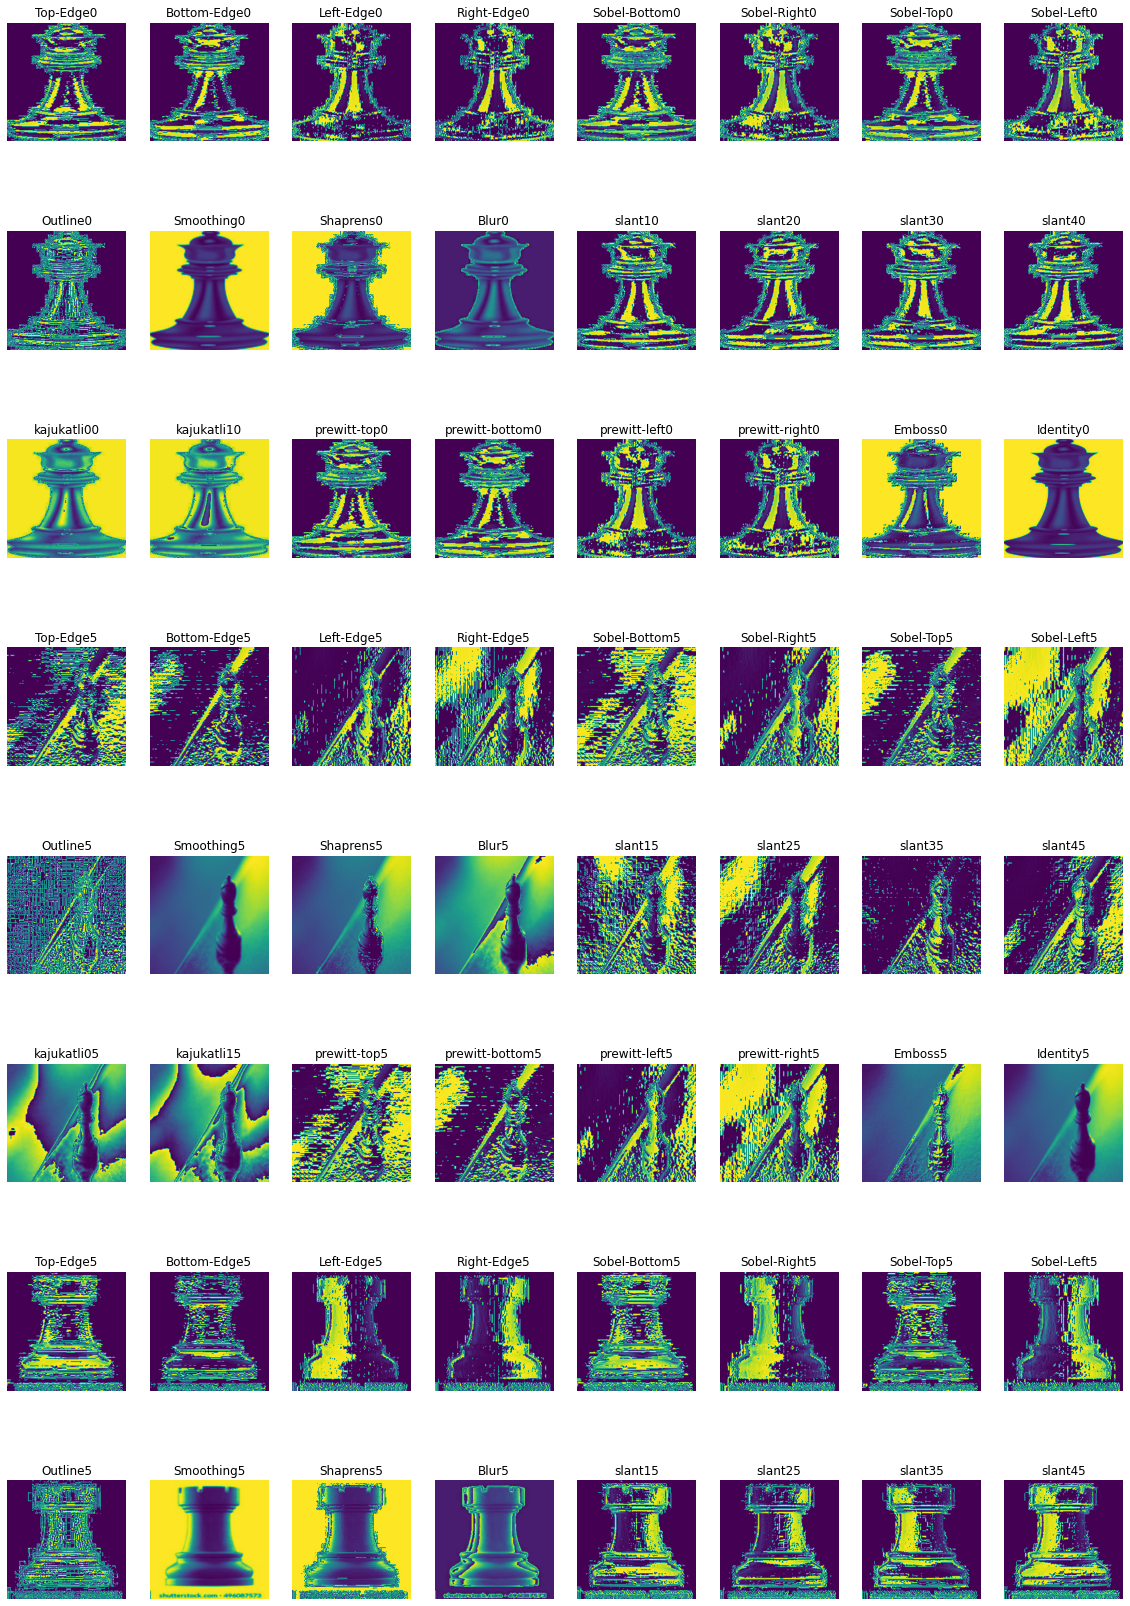

In [ ]:
plt.figure(figsize=(20, 30))
t = 0
for i in ans:
    for j in i[1:]:
        print(j)
        plt.subplot(8, 8, t + 1)
        # plt.lable(gray_labels[t])
        plt.title(f'{j[0]}{j[1]}')
        plt.imshow(np.array(j[2]).astype("uint8"))
        plt.axis("off")
        t += 1

In [ ]:
plt.figure(figsize=(15, 25))
t = 0

for i in ans:
    for j in i[1:]:
        print(j)
        plt.subplot(10, 10, t + 1)
        # plt.lable(gray_labels[t])
        plt.title(f'{j[0]}{j[1]}')
        plt.imshow(np.array(j[2]).astype("uint8"))
        plt.axis("off")
        t += 1

['Top-Edge', <tf.Tensor: shape=(), dtype=int32, numpy=0>, [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3418426513671875, 4.177886962890625, 1.8281402587890625, 13.979644775390625, 13.037612915039062, 11.709579467773438, -23.56890869140625, -87.41603088378906, -203.53123474121094, -348.41014862060547, -434.83985900878906, -447.78907012939453, -390.30469703674316, -327.8093547821045, -260.11913871765137, -197.65820693969727, -141.42697525024414, -90.33983993530273, -46.972652435302734, -10.7148418426513

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
for i in ans:
    for j in i[1:]:
        print(j)
        if j[0]=='Top-Edge':
            # plt.imsave('converted/rook/a.jpg', np.array(j[1]))
            cv2.imwrite('converted/rook/a.jpg', np.array(j[2]))
        break
    break

['Top-Edge', <tf.Tensor: shape=(), dtype=int32, numpy=0>, [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3418426513671875, 4.177886962890625, 1.8281402587890625, 13.979644775390625, 13.037612915039062, 11.709579467773438, -23.56890869140625, -87.41603088378906, -203.53123474121094, -348.41014862060547, -434.83985900878906, -447.78907012939453, -390.30469703674316, -327.8093547821045, -260.11913871765137, -197.65820693969727, -141.42697525024414, -90.33983993530273, -46.972652435302734, -10.7148418426513

#MaxPull

In [24]:
def maxpull(img,filter):
    row=len(img)
    col=len(img[0])


    start_row,start_col=0,0
    end_row,end_col=filter,filter

    update=[]
    while start_row+end_row<=row:
        check=img[start_row:start_row+end_row]
        # print(check,'dd')
        while start_col+end_col<=col:
            m=-1
            for k in range(len(check)):
                temp=np.max(check[k][start_col:start_col+end_col])
                m=max(m,np.max(temp))
            start_col+=1
            update.append(m)

        start_col=0
        start_row+=1

    count=0
    ans=[]
    for i in range(len(img)-filter+1):
        temp=[]
        for j in range(len(img)-filter+1):
            temp.append(update[count])
            count+=1
        ans.append(temp)

    return np.array(ans)
    # print(ans)

# img = [

#     [1, 2, 3, 4, 5, 6],
#     [7, 8, 9, 10, 11, 12],
#     [13, 14, 15, 16, 17, 18],
#     [19, 20, 21, 22, 23, 24],
#     [25, 26, 27, 28, 29, 30],
#     [31, 32, 33, 34, 35, 36],
# ]

# maxpull(img,3)

array([[15, 16, 17, 18],
       [21, 22, 23, 24],
       [27, 28, 29, 30],
       [33, 34, 35, 36]])

In [ ]:
images = glob.glob('Knight/*')
len(images)

4872

In [ ]:
iii = []

for i in images:
    i = cv2.imread(i)
    i = cv2.resize(i, (256,256))

    iii.append(i)

In [ ]:
ans = maxpull(iii[0], 3)

In [ ]:
ans.shape

(254, 254)

In [ ]:
# ans=[]
count=0
for i in iii:
    print(count)
    temp = []
    temp.append(i)
    count+=1
    for j, k in filters.items():
        name = str(count)
        conv = convolutional(np.array(i, dtype=float), k)
        # plt.imshow(conv)
        
        # temp.append([j, conv])
        # print(temp)
        # print(temp)
        # print(j)
        # name+=
        # print(name)
        name += '_'
        name += j
        path = '../pool1/Knight/{}.jpg'.format(name)
        # print(path)
        count+=1
        # plt.axis('off')
        cv2.imwrite(path, np.array(conv))
        # plt.imshow(conv)
        # break
    # ans.append(temp)
    print(count)
    # break
    # if count==4:
    #     break

0
25
25
50
50
75
75
100
100
125
125
150
150
175
175
200
200
225
225
250
250
275
275
300
300
325
325
350
350
375
375
400
400
425
425
450
450
475
475
500
500
525
525
550
550
575
575
600
600
625
625
650
650
675
675
700
700
725
725
750
750
775
775
800
800
825
825
850
850
875
875
900
900
925
925
950
950
975
975
1000
1000
1025
1025
1050
1050
1075
1075
1100
1100
1125
1125
1150
1150
1175
1175
1200
1200
1225
1225
1250
1250
1275
1275
1300
1300
1325
1325
1350
1350
1375
1375
1400
1400
1425
1425
1450
1450
1475
1475
1500
1500
1525
1525
1550
1550
1575
1575
1600
1600
1625
1625
1650
1650
1675
1675
1700
1700
1725
1725
1750
1750
1775
1775
1800
1800
1825
1825
1850
1850
1875
1875
1900
1900
1925
1925
1950
1950
1975
1975
2000
2000
2025
2025
2050
2050
2075
2075
2100
2100
2125
2125
2150
2150
2175
2175
2200
2200
2225
2225
2250
2250
2275
2275
2300
2300
2325
2325
2350
2350
2375
2375
2400
2400
2425
2425
2450
2450
2475
2475
2500
2500
2525
2525
2550
2550
2575
2575
2600
2600
2625
2625
2650
2650
2675
2675
2700
2700
27

In [ ]:
% ls

Bishop/  King/  Knight/  Pawn/  Queen/  Rook/


In [ ]:
len(glob.glob('../train/try/Rook/*'))

5123

In [ ]:
cnt = 0

for i in iii:
    # path = "../train/pool1/Knight/"
    path = "../pool1/Knight/"
    path += str(cnt)
    path += '.jpg'

    ans = maxpull(i, 3)

    cv2.imwrite(path, ans)
    print(cnt)
    cnt+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
% ls

0.jpg  aaaa.jpg  aaab.jpg  Bishop/  King/  Knight/  Pawn/  Queen/  Rook/


In [ ]:
len(glob.glob('Knight/*'))

4872

In [ ]:
% ls

00000001.jpg  00000054.jpg


In [17]:
img = glob.glob("*")
len(img)

4

In [ ]:
for i in img:
    i2 = i[:-3]
    i1 = cv2.imread(i)
    i1 = cv2.resize(i1, (256, 256))
    i2 += '_resized.jpg'
    cv2.imwrite(i2, i1)

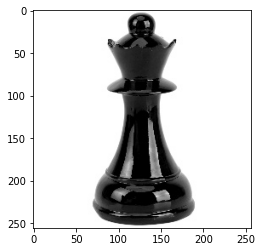

In [18]:
img = cv2.imread('./resize/00000001.jpg')
plt.imshow(img)

In [20]:
# ans=[]
count=0
# for i in iii:
#     print(count)
#     temp = []
#     temp.append(i)
#     count+=1
for j, k in filters.items():
    name = str(count)
    conv = convolutional(np.array(img, dtype=float), k)
    # plt.imshow(conv)
    
    # temp.append([j, conv])
    # print(temp)
    # print(temp)
    # print(j)
    # name+=
    # print(name)
    name += '_'
    name += j
    path = './conv1_filtered/{}.jpg'.format(name)
    # print(path)
    count+=1
    # plt.axis('off')
    cv2.imwrite(path, np.array(conv))
        # plt.imshow(conv)
        # break
    # ans.append(temp)
    # print(count)
    # break
    # if count==4:
    #     break

In [22]:
imgs = glob.glob('./conv1_filtered/*')

In [37]:
for i in imgs:
    img = cv2.imread(i)
    img = cv2.resize(img, (256, 256))
    img = np.array(img)

    mx = maxpull(img, 3)

    name = i[17:]
    path = './pool1/'
    path += 'new'
    path += name

    print(path)
    cv2.imwrite(path, np.array(mx))

    # path += i[14:-4]
    # path += 'mx'
    # path += '.jpg'
    # print(path)

    # break


./pool1/new3_Left-Edge.jpg
./pool1/new4_Right-Edge.jpg
./pool1/new7_Sobel-Top.jpg
./pool1/new9_Outline.jpg
./pool1/new14_slant3.jpg
./pool1/new18_prewitt-top.jpg


In [39]:
% ls

00000001.jpg  00000054.jpg  conv1_filtered/  pool1/  preprocessing/  resize/


In [40]:
img = glob.glob('./preprocessing/*')
img

['./preprocessing/00000002.jpg']

In [41]:
iimmgg = cv2.imread(img[0])

In [42]:
rsize = cv2.resize(iimmgg, (256, 256))
cv2.imwrite('./preprocessing/resized.jpg', rsize)

True

In [45]:
img = rgb2gray(rsize)
cv2.imwrite('./preprocessing/resized_gray.jpg', img)

True